<a href="https://colab.research.google.com/github/Linda-Agesa/Autolib_Analysis/blob/master/Week2_Financial_Inclusion_Analysis_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Financial Inclusion in East African Countries

##Context of the Research

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

>Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

##Problem Statement

>The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Our solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



> In order to work on the above problem, we need to do the following:

  1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
  2. Find and deal with outliers, anomalies, and missing data within the dataset.
  3. Plot univariate and bivariate summaries recording your observations.
  4. Implement the solution by performing the respective analysis i.e. reduction, modeling, etc.
  5. Challenge your solution by providing insights on how you can make improvements.

##Research Question

> What are the demographic factors help to determine whether an individual has or uses a bank account or not?

   - Here we test the variables that are signicant either negatively or positevely in  determining their relationship with dependent variable ('Has a bank account or not'). 

## Hypothesis Statements

It is popular belief that the population with a higher  level of education have a greater likelihood of seeking financial services from banks than people with no educational background or little educational experience.

According to the repository linked below,  a person with a higher level of education has a better level of understanding of banking products and services, they are able to communicate their needs to their service providers or may have higher levels of income all which would drive a person to seek financial services from a bank, the more likely they are to have a bank account. 

(http://erepository.uonbi.ac.ke/bitstream/handle/11295/89872/Maina_Factors%20influencing%20uptake%20of%20banking%20services%20in%20rural%20centers%20for%20Agricultural%20development.pdf?sequence=3) 

We seek to test this notion and determine whether the level of education a person obtains is signicant in determining whether or not they own and use a bank account.



---



#### Null Hypothesis
 
$H_0 : Level of Education   =   Significant$

#### Alternative Hypothesis

$H_1 : Level of Education$    $  !=  $     $Significant$



---



## Metrics for Success

- To determine the factors that determine the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda. 

- To design a model with an 88% effeciency in its prediction of individuals who have/ do not have bank accounts.

- Conclude if the a person's level of education is significant in determining whether they will seek financial services from a bank.

## Appropriateness of Available Data

- The data contains demographic information and the financial services used by individuals across East Africa. 

- The data is contains the information needed for investigation to answer our research question.

### Loading libraries and files to our Environment

In [0]:
# Loading the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score





In [176]:
# Loading the decription table
# This contains the description of the variables in our dataframe

description_df = pd.read_csv('http://bit.ly/VariableDefinitions')

description_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [0]:
#We will now load the dataset to our environment

financial_df = pd.read_csv('http://bit.ly/FinancialDataset')

##Data Understanding.

In [178]:
# Display the contents of the first five records in the dataset

financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


- We have pre-viewed the first five records of our dataset to get a glance at what we are working with. 

In [179]:
# Displaying the last five components in of our data

financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


- We have displayed the last 5 rows of our dataset.

In [180]:
# Using the info() function to investigate some of the features contained in our dataset.

financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


- The cell above displays some information about our data such as  such as the number non null of rows in each column,   columns contained in our dataframe, the data types of the columns and the memory usage.

#### Checking the Uniques values in each column

In [181]:
for i in financial_df.columns:
  print('\n')
  print(financial_df[i].unique())



['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


[2018 2029 2056 2016 2039 2017]


['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


['Yes' 'No' nan]


['Rural' 'Urban' nan]


['Yes' 'No' nan]


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]


['Female' 'Male' nan]


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]


['Seconda

#### Checking for Duplicate Records

In [182]:
# First lets check the shape of our dataframe

financial_df.shape

(23524, 13)

- Our dataframe has 23,524 rows and 13 columns

In [183]:
# Now we check to see the number of duplicate rows if any are present in our data

duplicated = len(financial_df[financial_df.duplicated(keep = 'first') == True] )

print( 'We have', duplicated, 'rows in our dataframe')

We have 0 rows in our dataframe


#### Exploring Our Columns

In [184]:
# Familiarizing ourselves with our data's column names

financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

  - There are a number of inconsistencies with our column names 
    - Some column names are all in lowercase while others both lower and uppercase.
    - Some columns names with multiple words are separated by space while others by the underscore.
    - Some column words are misspelt i.e (relathip : relationship) and (educuation : education)
    

    

In [185]:
# Renaming our columns 

financial_df.columns = financial_df.columns.str.replace('relathip', 'relationship').str.replace('educuation', 'education').str.replace(' ', '_').str.lower()

financial_df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

- We have corrected all the inconsitencies and there is uniformity and consistency of our column names.

#### Checking and Dealing with Missing Values

> Using the isnull() function, we will check the sum of null values in each row. We will then use the dropna() function to drop the rows of missing values.

In [186]:
# Let's check for null records in our dataset

financial_df.isnull().sum()


country                       14
year                           0
uniqueid                       0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_educuation           29
type_of_job                   30
dtype: int64

- Here we see the number of missing values in each column

In [0]:
#dropping the rows with missing values

fin_df = financial_df.dropna()

In [188]:
# Checking the shape of the dataframe after dropping the rows with missing values

financial_df.shape[0] - fin_df.shape[0]

181

- 181 rows have been dropped after getting rid of the missing values.

## Univariate EDA

> Univariate Exploratory Data Analysis aims to help us to describe our data by summarizing the data and enabling us to recognize patterns if they are present, one variable at a time. We will perform both graphical and non-graphical analysis on our data in order to get the most information we can out of our analysis.
- Non-graphical analysis includes :
  - Central Tendency (mean, mode and median)
  - Dispersion (variance, standard deviation, maximum, minimum, range and Interquartile range(IQR)) 
- Graphical analysis :
  - Frequency Distibution Tables
  - Bar Charts
  - Histograms
  - Pie Charts

###Non-Graphical Univariate EDA on Categorical Data
#### Central Tendency

- For categorical Data, we can only accomplish getting a listing of the mode and the proportion and percentage of the data for nominal variables and median, mode, range and IQR and percentiles and proportions of the data for ordinal variables.

In [189]:
fin_df.head(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


####  By Country

In [190]:
# Getting the the percentage of records recorded per country

country_records = pd.DataFrame(fin_df.country.value_counts(normalize = True )) # This line of code calculates the percentage of the records in our dataset per country

country_records

,country
Rwanda,0.372017
Tanzania,0.278456
Kenya,0.259778
Uganda,0.089749


- Rwanda has the highest percentage of records at 37 %  while Uganda has the lowest percentage of records at 8%

In [191]:
# Determining the number of people per country with a bank account

country_yes = fin_df.country[fin_df['has_a_bank_account'] == 'Yes'].value_counts()

country_yes = pd.DataFrame(country_yes) #Turning the subset into a DataFrame

country_yes                          #Displaying the subset

,country
Kenya,1520
Rwanda,997
Tanzania,599
Uganda,181


- From the subset of people with bank accounts per country 1520 are from Kenya, followed by  997 from Rwanda then 599 people are from Tanzania and lastly 181 people are from Uganda.

- From our sample, kenya has the highest number of people with a bank account.

In [192]:
# Determining the number of people per country without a bank account

country_no = fin_df.country[fin_df['has_a_bank_account'] == 'No'].value_counts()

country_no = pd.DataFrame(country_no) #Turning the subset into a DataFrame

country_no                          #Displaying the subset

,country
Rwanda,7687
Tanzania,5901
Kenya,4544
Uganda,1914


- From the subset of people without bank accounts, 7687 are from Rwanda, 5901 from Tanzania, 4544 from kenya and 1914 from Uganda.

- Also from our sample, Rwanda has the highest number of people without a bank account.

#### By Location of Respondents

In [193]:
# Checking the number of people sampled in the rural or urban centers samples per country

location = pd.DataFrame(fin_df, columns = ['country', 'type_of_location']) # Creating a subset of the country and type of location columns from the main dataframe

location = pd.DataFrame(location.groupby('country')['type_of_location'].value_counts()) # Grouping the data per country to give the number of people from rural and urban areas surveyed per country

location

type_of_location
country  type_of_location                  
Kenya    Rural                         3540
         Urban                         2524
Rwanda   Rural                         7442
         Urban                         1242
Tanzania Urban                         4724
         Rural                         1776
Uganda   Rural                         1506
         Urban                          589

In [194]:
# Checking the number of people sampled in the rural or urban centers samples per country with bank accounts

location_yes = pd.DataFrame(fin_df[fin_df.has_a_bank_account == 'Yes'], columns = ['country', 'type_of_location']) # Creating a subset of the country and type of location columns from the main dataframe

location_yes = pd.DataFrame(location_yes.groupby('country')['type_of_location'].value_counts()) # Grouping the data per country to give the number of people from rural and urban areas surveyed per country

location_yes

type_of_location
country  type_of_location                  
Kenya    Urban                          906
         Rural                          614
Rwanda   Rural                          616
         Urban                          381
Tanzania Rural                          369
         Urban                          230
Uganda   Urban                          117
         Rural                           64

In [195]:
# Checking the number of people sampled in the rural or urban centers samples per country without bank accounts

location_no = pd.DataFrame(fin_df[fin_df.has_a_bank_account == 'No'], columns = ['country', 'type_of_location']) # Creating a subset of the country and type of location columns from the main dataframe

location_no = pd.DataFrame(location_no.groupby('country')['type_of_location'].value_counts()) # Grouping the data per country to give the number of people from rural and urban areas surveyed per country

location_no

type_of_location
country  type_of_location                  
Kenya    Rural                         2926
         Urban                         1618
Rwanda   Rural                         6826
         Urban                          861
Tanzania Urban                         4494
         Rural                         1407
Uganda   Rural                         1442
         Urban                          472

#### By Gender of Respondents

In [196]:
# Investigating the number of male and female respondents per country

gender = pd.DataFrame(fin_df, columns = ['country', 'gender_of_respondent']) # Creating a subset of the dataset of the country and the gender of the respondents.

gender = pd.DataFrame(gender.groupby('country')['gender_of_respondent'].value_counts()) # Grouping the subset data to give the total number of male and female respondents per country.

gender

gender_of_respondent
country  gender_of_respondent                      
Kenya    Female                                3480
         Male                                  2584
Rwanda   Female                                5173
         Male                                  3511
Tanzania Female                                3732
         Male                                  2768
Uganda   Female                                1382
         Male                                   713

In [197]:
# Investigating the number of male and female respondents per country with bank accounts

gender_yes = pd.DataFrame(fin_df[fin_df.has_a_bank_account == 'Yes'], columns = ['country', 'gender_of_respondent']) # Creating a subset of the dataset of the country and the gender of the respondents with bank accounts

gender_yes = pd.DataFrame(gender_yes.groupby('country')['gender_of_respondent'].value_counts()) # Grouping the subset data to give the total number of male and female respondents per country.

gender_yes

gender_of_respondent
country  gender_of_respondent                      
Kenya    Male                                   820
         Female                                 700
Rwanda   Male                                   553
         Female                                 444
Tanzania Male                                   360
         Female                                 239
Uganda   Female                                  97
         Male                                    84

In [198]:
# Investigating the number of male and female respondents per country without Bank Accounts

gender_no = pd.DataFrame(fin_df, columns = ['country', 'gender_of_respondent']) # Creating a subset of the dataset of the country and the gender of the respondents.

gender_no = pd.DataFrame(gender_no.groupby('country')['gender_of_respondent'].value_counts()) # Grouping the subset data to give the total number of male and female respondents per country.

gender_no

gender_of_respondent
country  gender_of_respondent                      
Kenya    Female                                3480
         Male                                  2584
Rwanda   Female                                5173
         Male                                  3511
Tanzania Female                                3732
         Male                                  2768
Uganda   Female                                1382
         Male                                   713

####  By Level of Education of Respondents

In [199]:
# Determining the level of education of the respondents in each country

loe_df = pd.DataFrame(fin_df, columns = ['country', 'level_of_educuation']) # Creating a slice of the dataframe containing the country and level of education columns

loe_df = pd.DataFrame(loe_df.groupby('country')['level_of_educuation'].value_counts())

loe_df

level_of_educuation
country  level_of_educuation                                 
Kenya    Primary education                               2596
         Secondary education                             1785
         No formal education                              941
         Vocational/Specialised training                  442
         Tertiary education                               292
         Other/Dont know/RTA                                8
Rwanda   Primary education                               4809
         No formal education                             2105
         Secondary education                             1485
         Tertiary education                               176
         Vocational/Specialised training                   91
         6                                                 18
Tanzania Primary education                               4158
         No formal education                             1102
         Tertiary education                               644
         Secondary education                              424
         Vocational/Specialised training                  169
         6                                                  3
Uganda   Primary education                               1126
         Secondary education                              513
         No formal education                              319
         Vocational/Specialised training                   99
         Tertiary education                                32
         6                                                  6

In [200]:
# Determining the level of education of the respondents with a bank account in each country

y_loe_df = pd.DataFrame(fin_df[fin_df.has_a_bank_account == 'Yes'], columns = ['country', 'level_of_educuation']) # Creating a slice of the dataframe containing the country and level of education columns

y_loe_df = pd.DataFrame(y_loe_df.groupby('country')['level_of_educuation'].value_counts())

y_loe_df

level_of_educuation
country  level_of_educuation                                 
Kenya    Secondary education                              548
         Primary education                                402
         Vocational/Specialised training                  265
         Tertiary education                               218
         No formal education                               81
         Other/Dont know/RTA                                6
Rwanda   Primary education                                430
         Secondary education                              331
         Tertiary education                               135
         No formal education                               76
         Vocational/Specialised training                   21
         6                                                  4
Tanzania Primary education                                213
         Tertiary education                               212
         Vocational/Specialised training                  123
         Secondary education                               35
         No formal education                               15
         6                                                  1
Uganda   Secondary education                               67
         Vocational/Specialised training                   47
         Primary education                                 38
         Tertiary education                                25
         No formal education                                4

In [201]:
# Determining the level of education of the respondents without a bank account in each country

n_loe_df = pd.DataFrame(fin_df[fin_df.has_a_bank_account == 'No'], columns = ['country', 'level_of_educuation']) # Creating a slice of the dataframe containing the country and level of education columns

n_loe_df = pd.DataFrame(n_loe_df.groupby('country')['level_of_educuation'].value_counts())

n_loe_df

level_of_educuation
country  level_of_educuation                                 
Kenya    Primary education                               2194
         Secondary education                             1237
         No formal education                              860
         Vocational/Specialised training                  177
         Tertiary education                                74
         Other/Dont know/RTA                                2
Rwanda   Primary education                               4379
         No formal education                             2029
         Secondary education                             1154
         Vocational/Specialised training                   70
         Tertiary education                                41
         6                                                 14
Tanzania Primary education                               3945
         No formal education                             1087
         Tertiary education                               432
         Secondary education                              389
         Vocational/Specialised training                   46
         6                                                  2
Uganda   Primary education                               1088
         Secondary education                              446
         No formal education                              315
         Vocational/Specialised training                   52
         Tertiary education                                 7
         6                                                  6

#### By Type of Job of the Respondents


In [202]:
# Determining the type of jobs of the respondents in each country

job = pd.DataFrame(fin_df, columns = ['country', 'type_of_job']) # Creating a slice of the dataframe containing the country and type of job columns

job = pd.DataFrame(job.groupby('country')['type_of_job'].value_counts())

job

type_of_job
country  type_of_job                              
Kenya    Farming and Fishing                  1606
         Informally employed                  1419
         Remittance Dependent                 1188
         Self employed                         954
         Formally employed Private             416
         Formally employed Government          259
         Other Income                          154
         Government Dependent                   65
         Dont Know/Refuse to answer              3
Rwanda   Farming and Fishing                  3816
         Informally employed                  2854
         Remittance Dependent                  657
         Self employed                         600
         Other Income                          323
         Formally employed Private             161
         Formally employed Government          127
         Government Dependent                   91
         Dont Know/Refuse to answer             55
Tanzania Self employed                        3705
         Informally employed                  1277
         Remittance Dependent                  664
         No Income                             373
         Formally employed Private             363
         Government Dependent                   84
         Other Income                           34
Uganda   Self employed                        1102
         Other Income                          566
         No Income                             245
         Formally employed Private             108
         Dont Know/Refuse to answer             67
         Government Dependent                    7

In [203]:
job.unstack()

type_of_job  ...              
type_of_job Dont Know/Refuse to answer  ... Self employed
country                                 ...              
Kenya                              3.0  ...         954.0
Rwanda                            55.0  ...         600.0
Tanzania                           NaN  ...        3705.0
Uganda                            67.0  ...        1102.0

[4 rows x 10 columns]

In [204]:
# Determining the type of jobs of the respondents with bank accounts in each country

job_yes = pd.DataFrame(fin_df[fin_df.has_a_bank_account == 'Yes'], columns = ['country', 'type_of_job']) # Creating a slice of the dataframe containing the country and type of job columns

job_yes = pd.DataFrame(job_yes.groupby('country')['type_of_job'].value_counts())

job_yes

type_of_job
country  type_of_job                              
Kenya    Self employed                         364
         Farming and Fishing                   310
         Formally employed Private             225
         Formally employed Government          215
         Informally employed                   186
         Remittance Dependent                  137
         Other Income                           63
         Government Dependent                   19
         Dont Know/Refuse to answer              1
Rwanda   Farming and Fishing                   324
         Informally employed                   189
         Self employed                         180
         Formally employed Government           84
         Other Income                           82
         Remittance Dependent                   69
         Formally employed Private              56
         Dont Know/Refuse to answer              8
         Government Dependent                    5
Tanzania Formally employed Private             232
         Self employed                         232
         Informally employed                    65
         Remittance Dependent                   34
         Government Dependent                   23
         No Income                               8
         Other Income                            5
Uganda   Self employed                          68
         Formally employed Private              54
         Other Income                           46
         Dont Know/Refuse to answer              5
         No Income                               5
         Government Dependent                    3

In [205]:
# Determining the type of jobs of the respondents without bank accounts in each country

job_no = pd.DataFrame(fin_df, columns = ['country', 'type_of_job']) # Creating a slice of the dataframe containing the country and type of job columns

job_no = pd.DataFrame(job_no.groupby('country')['type_of_job'].value_counts())

job_no

type_of_job
country  type_of_job                              
Kenya    Farming and Fishing                  1606
         Informally employed                  1419
         Remittance Dependent                 1188
         Self employed                         954
         Formally employed Private             416
         Formally employed Government          259
         Other Income                          154
         Government Dependent                   65
         Dont Know/Refuse to answer              3
Rwanda   Farming and Fishing                  3816
         Informally employed                  2854
         Remittance Dependent                  657
         Self employed                         600
         Other Income                          323
         Formally employed Private             161
         Formally employed Government          127
         Government Dependent                   91
         Dont Know/Refuse to answer             55
Tanzania Self employed                        3705
         Informally employed                  1277
         Remittance Dependent                  664
         No Income                             373
         Formally employed Private             363
         Government Dependent                   84
         Other Income                           34
Uganda   Self employed                        1102
         Other Income                          566
         No Income                             245
         Formally employed Private             108
         Dont Know/Refuse to answer             67
         Government Dependent                    7

### Non-Graphical EDA on Numerical Data

- Involves calculating the mean, mode and median, variance, IQR  and standard deviation of numerical variables.

- Skewness and kurtosis

In [206]:
#we will usde the descibe() function to give a summary of the calculated measures
#of central tendencies and dispersion

fin_df.describe() 

,year,household_size,respondent_age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


###Graphical  Univariate EDA 



#### By Country

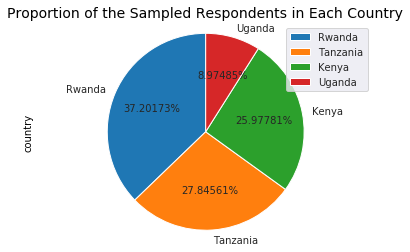

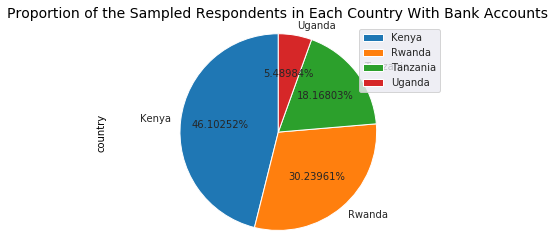

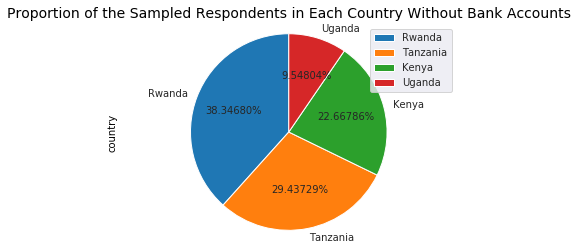

In [207]:
# We will now plot pie charts to give graphically show the percentage of respondents sampled in each country.

country_records.plot.pie(y = 'country', autopct = '%2.5f%%', startangle = 90)

plt.axis('equal')
plt.title('Proportion of the Sampled Respondents in Each Country', color = 'black', fontsize = 14)
plt.ylabel('country', color = 'black')
plt.show()
print('\n')

# We also plot a pie chart to show the percentage of the respondents sampled with bank accounts per country.
country_yes.plot.pie(y = 'country', autopct = '%2.5f%%', startangle = 90, )

plt.axis('equal')
plt.title('Proportion of the Sampled Respondents in Each Country With Bank Accounts', color = 'black', fontsize = 14)
plt.ylabel('country', color = 'black')
plt.show()
print('\n')

# The final pie chart is that which shows the proportion of respondents without bank accounts in each country.
country_no.plot.pie(y = 'country', autopct = '%2.5f%%', startangle = 90)

plt.axis('equal')
plt.title('Proportion of the Sampled Respondents in Each Country Without Bank Accounts', color = 'black', fontsize = 14)
plt.ylabel('country', color = 'black')
plt.show()


#### By location of Respondents

- We will use bar graphs to give a pictorial representation of the number of respondents by location in each country.

- We will use the matplotib library for this plotting.

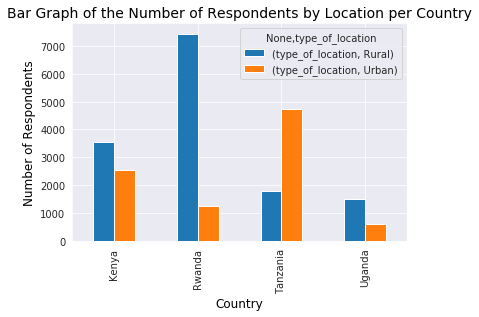

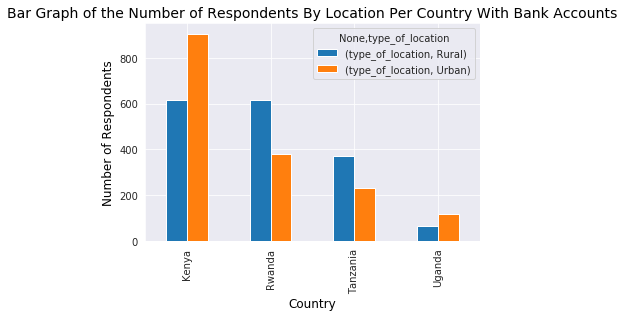

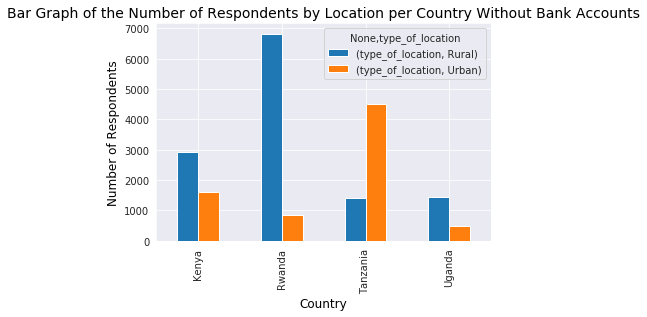

In [208]:
# Plotting the bar graphs for the number of respondents by location in each of the countries

location.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents by Location per Country', color = 'black', fontsize = 14)
plt.show()
print('\n')


# Plotting a bar graph giving a graphical representation of the number of people by location with bank accounts per country 
location_yes.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents By Location Per Country With Bank Accounts', color = 'black', fontsize = 14)
plt.show()
print('\n')

# Plotting a bar graph giving a graphical representation of the number of people by location without bank accounts per country 
location_no.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents by Location per Country Without Bank Accounts', color = 'black', fontsize = 14)
plt.show()




#### By Gender of Respondents

- We will now plot the graphs of the respondents by gender in each country

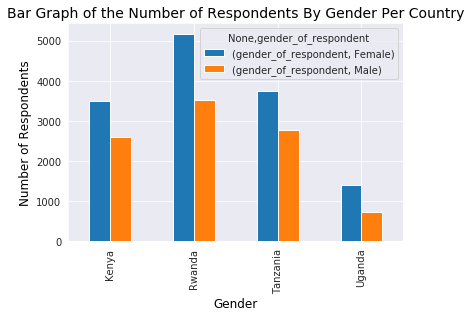

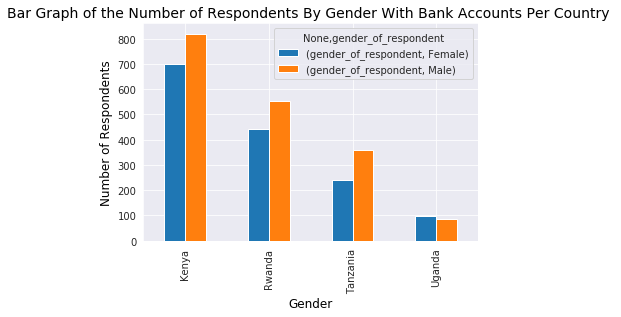

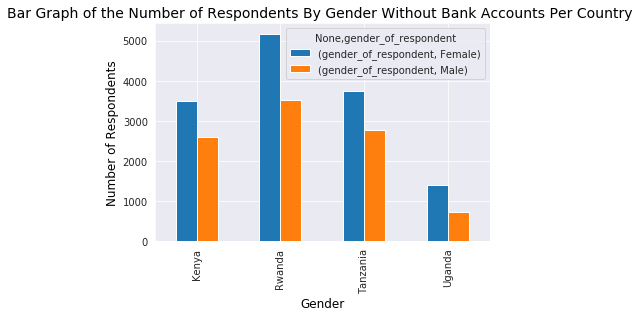

In [209]:
#Plotting a bar graph of the total number of repondents by gender per country

gender.unstack().plot.bar()

plt.xlabel('Gender', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents By Gender Per Country', color = 'black', fontsize = 14)
plt.show()
print('\n')

#Plotting a bar graph of the total number of repondents by gender per country with bank accounts

gender_yes.unstack().plot.bar()

plt.xlabel('Gender', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents By Gender With Bank Accounts Per Country ', color = 'black', fontsize = 14)
plt.show()
print('\n')

#Plotting a bar graph of the total number of repondents by gender per country without bank accounts

gender_no.unstack().plot.bar()

plt.xlabel('Gender', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents By Gender Without Bank Accounts Per Country ', color = 'black', fontsize = 14)
plt.show()


#### By Level of Education of Respondents

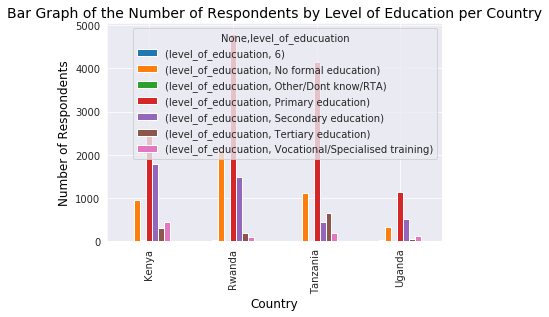

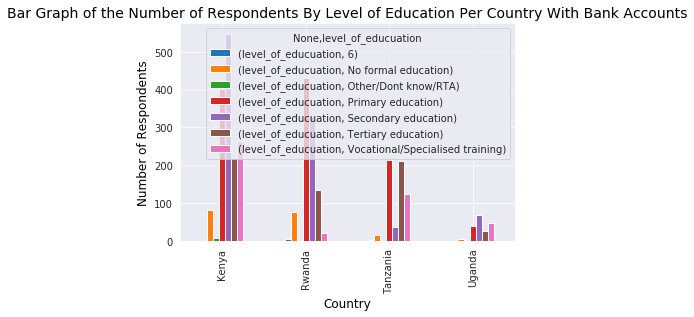

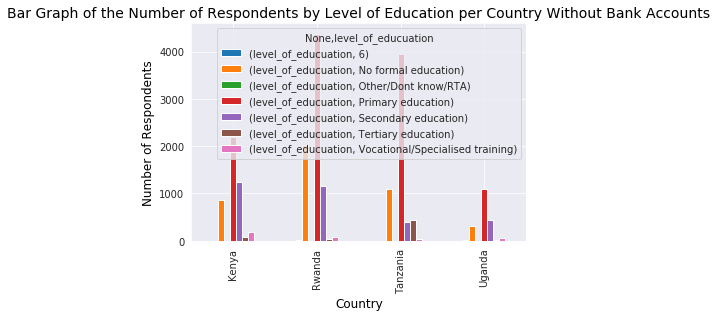

In [210]:
# Plotting the bar graphs for the number of respondents by location in each of the countries
figsize = (30, 12)
loe_df.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents by Level of Education per Country', color = 'black', fontsize = 14)
plt.show()
print('\n')


# Plotting a bar graph giving a graphical representation of the number of people by location with bank accounts per country 
y_loe_df.unstack().plot.bar(legend = 'topright')

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents By Level of Education Per Country With Bank Accounts', color = 'black', fontsize = 14)
plt.show()
print('\n')

# Plotting a bar graph giving a graphical representation of the number of people by location without bank accounts per country 
n_loe_df.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents by Level of Education per Country Without Bank Accounts', color = 'black', fontsize = 14)
plt.show()


#### By Type of Job of the Respondents

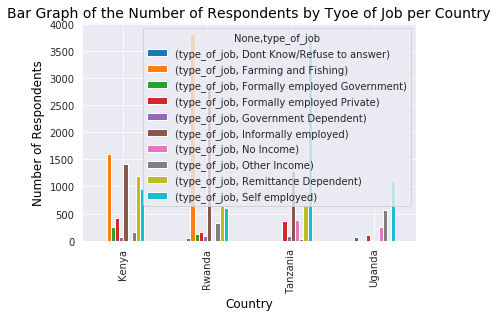

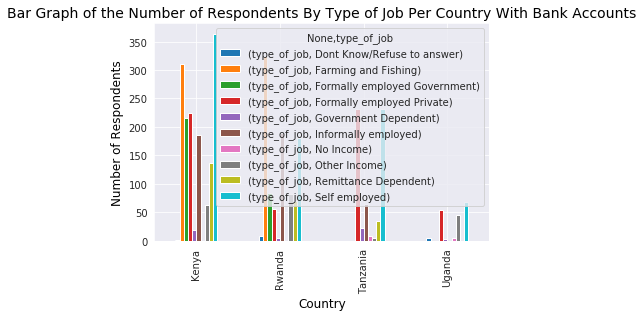

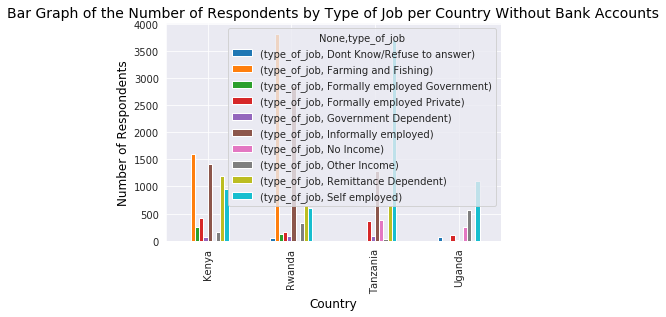

In [211]:
# Plotting the bar graphs for the number of respondents by the type of job in each of the countries

job.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents by Tyoe of Job per Country', color = 'black', fontsize = 14)
plt.show()
print('\n')


# Plotting a bar graph giving a graphical representation of the number of people by the type of job with bank accounts per country 
job_yes.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents By Type of Job Per Country With Bank Accounts', color = 'black', fontsize = 14)
plt.show()
print('\n')

# Plotting a bar graph giving a graphical representation of the number of people by the type of job without bank accounts per country 
job_no.unstack().plot.bar()

plt.xlabel('Country', color = 'black', fontsize = 12)
plt.ylabel('Number of Respondents', color = 'black', fontsize = 12)
plt.title('Bar Graph of the Number of Respondents by Type of Job per Country Without Bank Accounts', color = 'black', fontsize = 14)
plt.show()


#### By Household Size

- We use a histogram to determine the type of distibution of the household size column while presenting the information  graphically.

- We will use the seaborn library to achieve this.

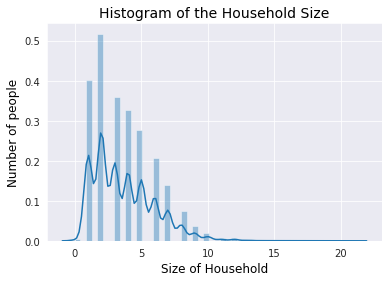

In [212]:
# Plotting a seaborn histogram of the household size column of our data

sns.distplot(fin_df.household_size, bins = None)

plt.xlabel('Size of Household', color = 'black', fontsize =12)
plt.ylabel('Number of people', color ='black', fontsize = 12)
plt.title('Histogram of the Household Size', color = 'black', fontsize = 14)
plt.show()

- This data is not normally distributed

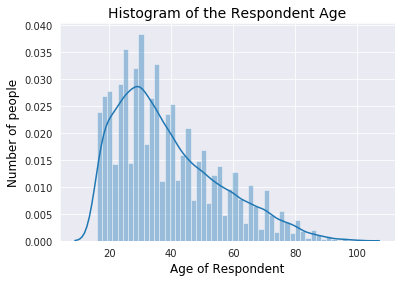

In [213]:
# Plotting a seaborn histogram of the respondent column of our data


sns.distplot(fin_df.respondent_age)

plt.xlabel('Age of Respondent', color = 'black', fontsize =12)
plt.ylabel('Number of people', color ='black', fontsize = 12)
plt.title('Histogram of the Respondent Age', color = 'black', fontsize = 14)
plt.show()

- The respondents age is skewed to the right.

## Bivariate EDA

- In bivariate exploratory data analysis, we aim to find the relationship between any two variables.
- We will use various techniques to examine the correlation of variables.
- The following are some of the methods used to to test for correlation:
  - Seaborn Pairplots
  - Heat Maps
  - Pearson Correlation Coefficient

#### Disclaimer!
Correlation does not imply causation. It does not ascertain a cause and effect relationship.

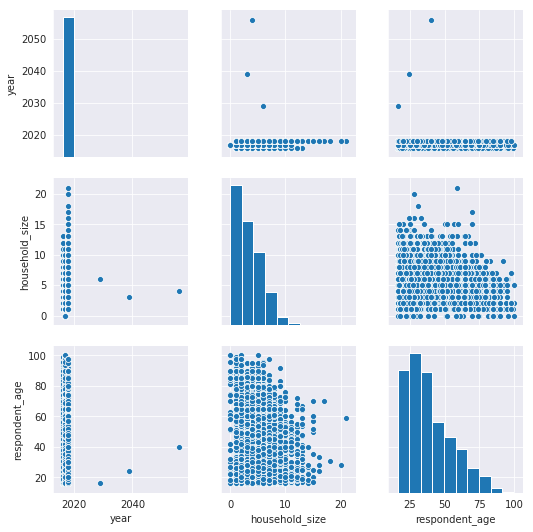

In [214]:
# Using the seaborn pairplot to investigayte the relationship between variables

sns.pairplot(fin_df)

plt.show()

- From the above plot, we see that there is absolutely no linear correlation between the numerical variables.

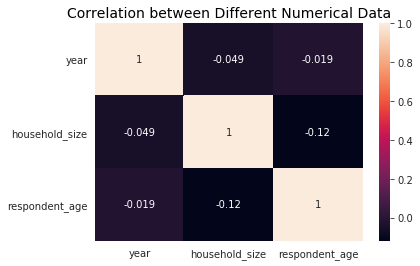

In [215]:
# We then plot a heatmap to see the degree of correlation if any.

# Finding the correlation between variables

corr_df = fin_df.corr()

#representing the correlation visually on a heatmap, we have:

sns.heatmap(corr_df, annot = True)

plt.title('Correlation between Different Numerical Data', color = 'black', fontsize = 14)

plt.show()




- From the map we observe close to zero relation between variables

##### Pearson Correlation Coefficient

- To use the PCC to test for correlation, the following assumptions need to be met:

    -  The data should follow a normal distribution
    -  The variables ypu use are continuous and numeric
    -  The variables are linearly related.
    
-  From our numerical variables, the data is continuous but not normally distributed nor linearly related. Hence we cannot use the PCC to check for correlation.

##Data Cleaning

### Outliers - Identifying and Dealing with Outliers

We will use box plots to identify outliers to check for outliers in the columns with numerical entries.


#### Year Column

In [216]:
# Let us identify the unique entries in this column

fin_df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

- We see that the years included are 2016,  2017, 2018 ,2029,  2039, 2056.

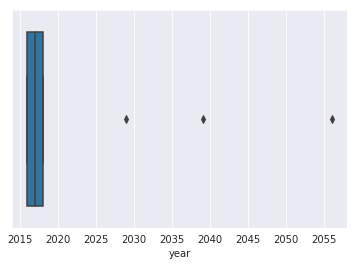

In [217]:
# Plotting a boxplot using the seaborn library to get a visual representation of the data

sns.boxplot(x = 'year', data = fin_df)
plt.show()

- The boxplot shows that the years 2029, 2039,2056 are clearly outliers and each year contains only one entry.

In [218]:
# Checking to confirm that the records have been deleted
fin_df = fin_df[~((fin_df.year == 2029) | (fin_df.year == 2039) | (fin_df.year == 2056 ))]

fin_df.year.unique()

array([2018, 2016, 2017])

- The entries with the years that are not in the average range of our study have been deleted. We use the unique() function to confirm that they have been removed.

In [219]:
#reindexing for uniformity

fin_df.reindex(axis = 0)


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


#### Age of the Respondents and Household Size Columns

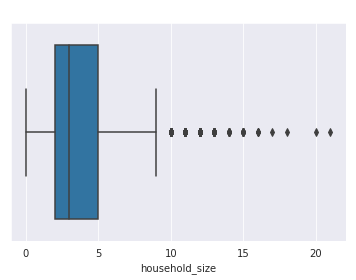

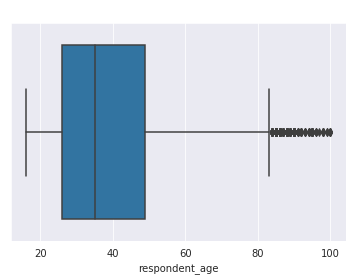

In [220]:
sns.boxplot(fin_df[ 'household_size'])

plt.title('Boxplot of the Household Size', color = 'white', fontsize = 14) 
plt.show()

sns.boxplot(fin_df[ 'respondent_age'])

plt.title('Boxplot of the Age of the Respondents', color = 'white', fontsize = 14)
plt.show()

- In the respondents age and household size columns, removal of the outlier will negatively affect our analysis as the there too many outliers to deal with.

#### Dropping the Unique ID Column

In [221]:
fin_df.drop('uniqueid', axis = 1, inplace = True )

fin_df.head(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


## Implementing the Solution

#### Defining the X and Y variables

> We need to define our dependent(outcome variable) an independent(predictor) variables before analysis so that we obtain the predictor variables that are presumed to cause the differences in variable out comes and the out come variable which is the outcome that our research is studying

In [0]:
X = fin_df.drop('has_a_bank_account', axis = 1)
Y = fin_df['has_a_bank_account']

In [224]:
X.head(3)

,country,year,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [226]:
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has_a_bank_account, dtype: object

- We have defined our independent variable X and our dependent variable Y 

In [227]:
# using the get_dummies() function to turn categorical data to numerical data
X = pd.get_dummies(X)

X.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


-  We have assigned dummy values to the variables that contain categorical data to enable us to fit a model in our analysis.

#### Split the Data into Training and Test sets

In [0]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

- We have split our data into control group(test set) and experimental group(train set)

#### Standardizing the data

> Standardization is an important step as it scales the values of the variables with an aim of balancing the variance of variable to avoid bias of the model in analysis.

> This procedure is regarded as a pre-processing step.

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Dimension Reduction

> We will use the PCA method to reduce the number of dimensions of our data before we fit an appropriate model.

In [0]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

# We now pply the number of components we desire to the PCA() function for reduction
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

- We have chosen to reduce the number of components of our data to 10.

#### Fitting a Model

> We will use a linear logistic regression model for our analysis as we want to predict the probability  of either one of two outcomes.

In [237]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test) 

### Performance Evaluation : Deternining the Accuracy of our Model

>  We use the accuracy matrix to determine the number of predictions that were spot on and those that we failed to predict.

> The accuracy score function shows us the probability of the accuracy of our model predictions.

In [240]:
print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[5930  116]
 [ 718  238]]
0.8808911739502999


## Challenging the Solution

## Summary and Conclusions